## QN 2

In [203]:
import pandas as pd
import numpy as np
import random
from random import sample
from math import dist
from matplotlib import pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

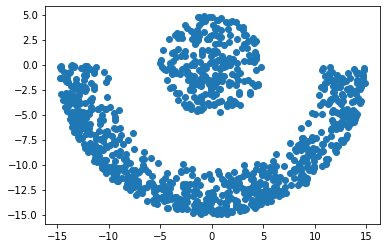

In [204]:
dataset = pd.read_csv("C:\\Users\\Krishna\\Jupyter notebook files\\PRML\\Assignment 1\\cm_dataset_2.csv")
X = dataset.values
plt.scatter(dataset.iloc[:,0],dataset.iloc[:,1])
plt.show()

### i

In [242]:
def kmeans(X,k,mu_0 = None,max_iter=1000,tol=1):
    
    if mu_0 is None:
        mu_0 = np.array(sample(list(X),k))
    
    ite = 0
    mu_i = mu_0
    error_history = []
    
    
    while ite < max_iter:
        
        # cluster reassignment
        z = []
        for i in range(X.shape[0]):
            dis = [dist(X[i],mu_i[j]) for j in range(k)]
            z.append(dis.index(min(dis)))
        
        # mean calculation
        mu_new = np.zeros((k,2))
        for i in range(len(z)):
            mu_new[z[i]] = np.add(mu_new[z[i]],X[i])
        mu_new = [mu_new[i]/z.count(i) for i in range(len(mu_new))]
        
        # error
        error = 0
        for i in range(len(X)):
            error += dist(X[i],mu_new[z[i]])**2
        error_history.append(error)
        
        if ite>=1:
            if abs(error_history[-1]-error_history[-2]) < tol:
                z = []
                for i in range(X.shape[0]):
                    dis = [dist(X[i],mu_i[j]) for j in range(k)]
                    z.append(dis.index(min(dis)))
                print('Converged at iteration {}'.format(ite+1))
                break
        mu_i = mu_new
        ite+=1
    
    if ite == max_iter:
        z = []
        for i in range(X.shape[0]):
            dis = [dist(X[i],mu_i[j]) for j in range(k)]
            z.append(dis.index(min(dis)))
        print('Not converged')
    
    return mu_i,z,error_history

In [5]:
def show_results(X,k,mu_0,mu_i,z,error_history):
    
    data = X.T
    
    plt.figure(figsize = (21,6))
    
    plt.subplot(1,3,1)
    plt.scatter(data[0],data[1],label='Given data')
    plt.scatter(list(zip(*mu_0))[0],list(zip(*mu_0))[1],marker = '*',color = 'r',label='Initialized means')
    plt.xlabel('1st dimension of the dataset')
    plt.ylabel('2nd dimension of the dataset')
    plt.title('Data with randomly initialized means')
    plt.legend(loc='best')
    
    
    plt.subplot(1,3,2)
    plt.scatter(data[0],data[1],c=z,label='Clustered data')
    plt.scatter(list(zip(*mu_i))[0],list(zip(*mu_i))[1],marker = '*',color = 'r',label='Means of clusters')
    plt.xlabel('1st dimension of the dataset')
    plt.ylabel('2nd dimension of the dataset')
    plt.title('Clusterred data with k={}'.format(k))
    plt.legend(loc='best')
    
    
    plt.subplot(1,3,3)
    plt.plot(error_history)
    plt.xlabel('Iterations')
    plt.xticks(list(range(len(error_history))))
    plt.ylabel('Error')
    plt.title('Error v/s iteration')
    
    plt.show()
    

## Random initialziation 1

In [243]:
random.seed(1)
mu_0 = np.array(sample(list(X),2))
mu_i,z,error_history = kmeans(X,2,mu_0,max_iter=1000)

Converged at iteration 25


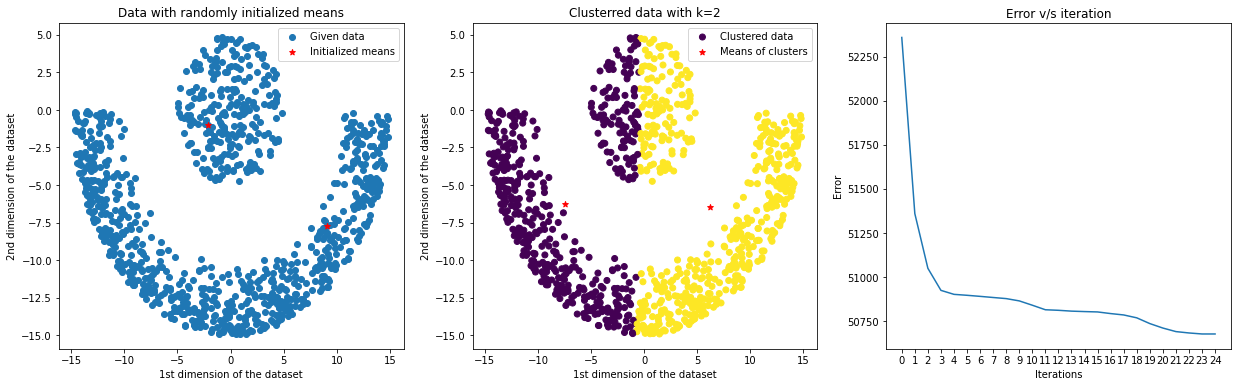

In [244]:
show_results(X,2,mu_0,mu_i,z,error_history)

## Random initialization 2

In [245]:
random.seed(2)
mu_0 = np.array(sample(list(X),2))
mu_i,z,error_history = kmeans(X,2,mu_0,max_iter=1000)

Converged at iteration 16


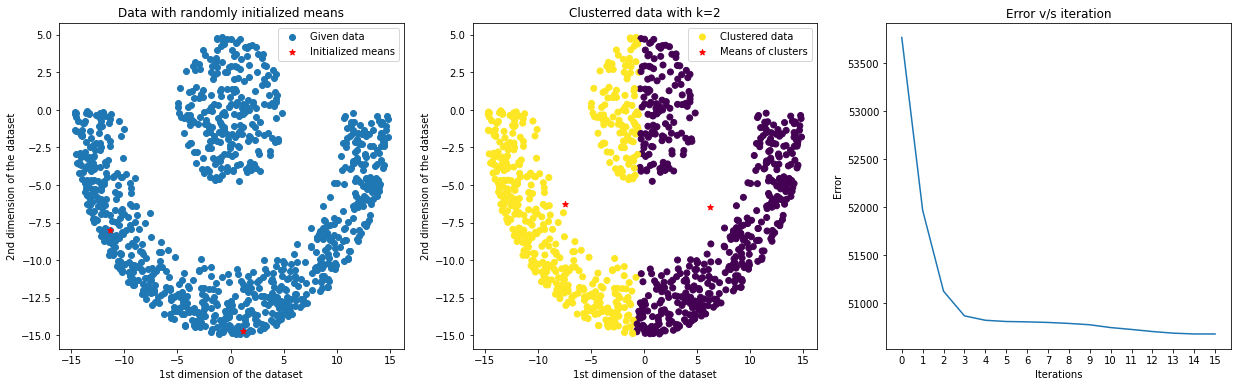

In [246]:
show_results(X,2,mu_0,mu_i,z,error_history)

## Random initialization 3

In [247]:
random.seed(3)
mu_0 = np.array(sample(list(X),2))
mu_i,z,error_history = kmeans(X,2,mu_0,max_iter=1000)

Converged at iteration 12


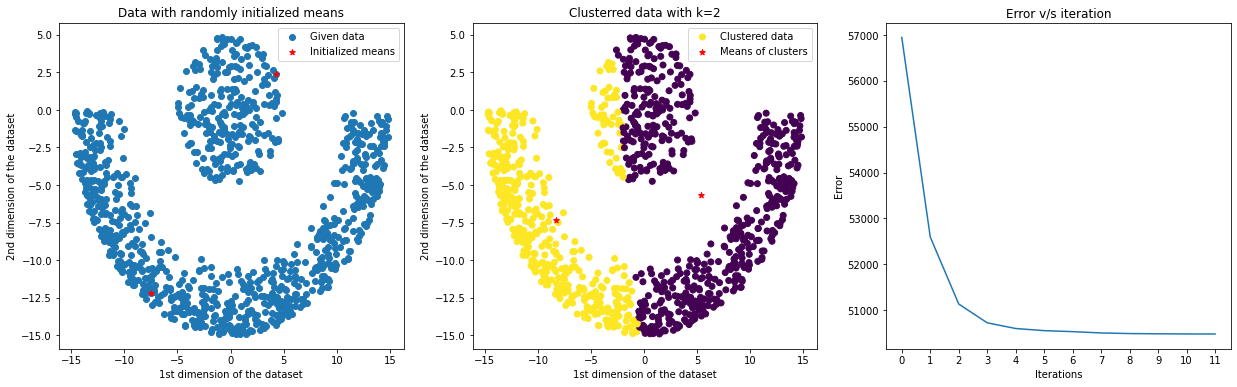

In [248]:
show_results(X,2,mu_0,mu_i,z,error_history)

## Random initialization 4

In [249]:
random.seed(32)
mu_0 = np.array(sample(list(X),2))
mu_i,z,error_history = kmeans(X,2,mu_0,max_iter=1000)

Converged at iteration 26


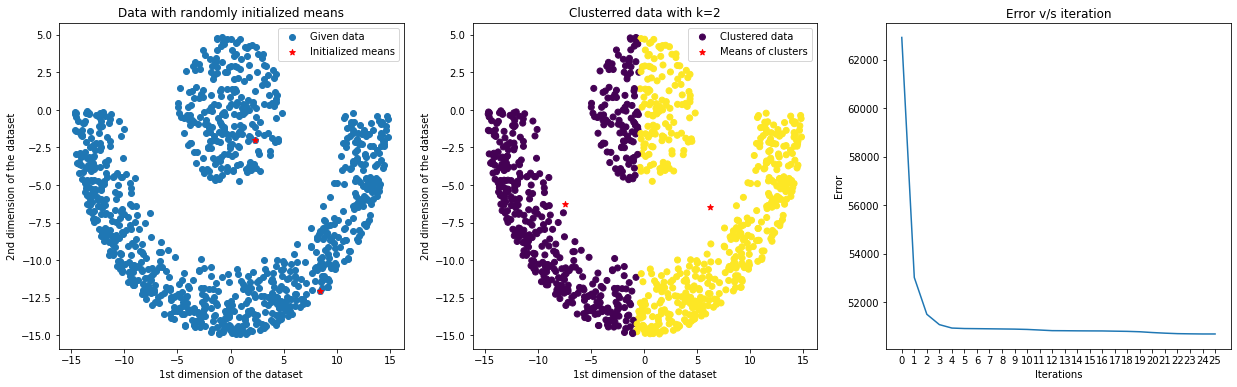

In [250]:
show_results(X,2,mu_0,mu_i,z,error_history)

## Random initialization 5

In [251]:
random.seed(30)
mu_0 = np.array(sample(list(X),2))
mu_i,z,error_history = kmeans(X,2,mu_0,max_iter=1000)

Converged at iteration 10


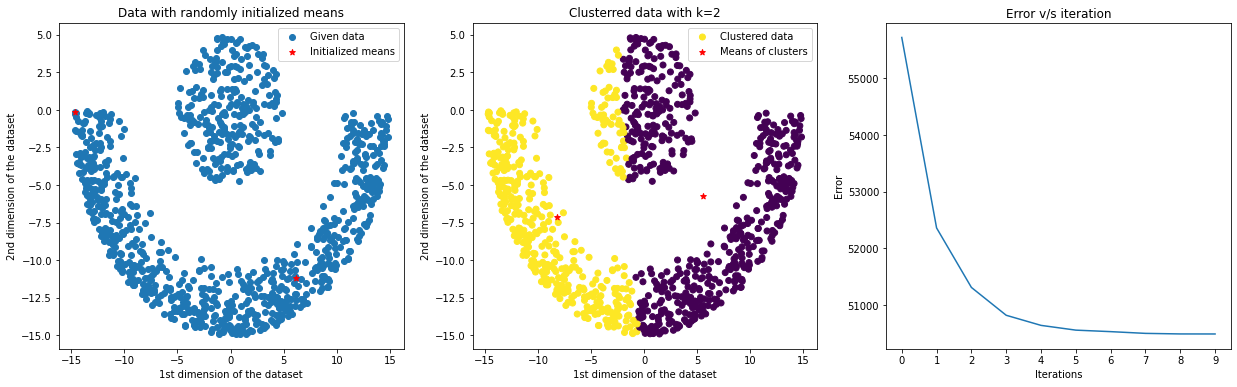

In [252]:
show_results(X,2,mu_0,mu_i,z,error_history)

## ii

In [253]:
# Random initialization
random.seed(86)
mu_rand = np.array(random.sample(list(X),5))
mu_rand

array([[ 11.714  ,  -4.7312 ],
       [ 10.604  ,  -6.7081 ],
       [ -1.8043 ,   0.17665],
       [ -5.6181 , -12.448  ],
       [-12.831  ,  -4.678  ]])

In [328]:
def show_results_2(X,k,mu_rand):
    
    data = X.T
    mu_0 = mu_rand[:k]
    mu_i,z,_ = kmeans(X,k,mu_0)
    
    plt.figure(figsize = (7,5))
    
    plt.scatter(data[0],data[1],label='Given data')
    plt.scatter(list(zip(*mu_0))[0],list(zip(*mu_0))[1],marker = '*',color = 'r',label='Initialized means')
    plt.xlabel('1st dimension of the dataset')
    plt.ylabel('2nd dimension of the dataset')
    plt.title('Data with randomly initialized means')
    plt.legend(loc='best')
    
    if k==2:
        slope, intercept = np.polyfit(list(zip(*mu_i))[0],list(zip(*mu_i))[1], 1)
        m = -1/slope
        bisec = (mu_i[0] + mu_i[1])/2
        c = bisec[1] - m*bisec[0]
        x = np.linspace(-5,5,100)
        y = m*x+c
        plt.figure(figsize=(7,5))
        plt.scatter(data[0],data[1],c=z)
        plt.plot(x,y,color='k',ls='--',label='Voronoi boundary')
        plt.scatter(list(zip(*mu_i))[0],list(zip(*mu_i))[1],marker = '*',color = 'red')
        plt.xlim([min(data[0]),max(data[0])])
        plt.ylim([min(data[1]),max(data[1])])
        plt.xlabel('1st dimension of the dataset')
        plt.ylabel('2nd dimension of the dataset')
        plt.title('Voronoi regions for k ={}'.format(k))
        plt.legend(loc='best')
        
    if k>2:
        vor = Voronoi(mu_i)
        fig = voronoi_plot_2d(vor,show_points=False,show_vertices=False,label='Vornoi boundaries')
        fig.set_size_inches(7,5)
        plt.scatter(data[0],data[1],c=z)
        plt.scatter(list(zip(*mu_i))[0],list(zip(*mu_i))[1],marker = '*',color = 'red')
        plt.xlim([min(data[0]),max(data[0])])
        plt.ylim([min(data[1]),max(data[1])])
        plt.xlabel('1st dimension of the dataset')
        plt.ylabel('2nd dimension of the dataset')
        plt.title('Voronoi regions for k ={}'.format(k))
        plt.legend(['Vornoi boundaries'],loc='best')
    
    plt.show()
    

## k = 2

Converged at iteration 16


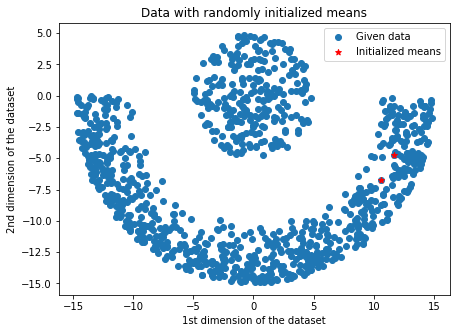

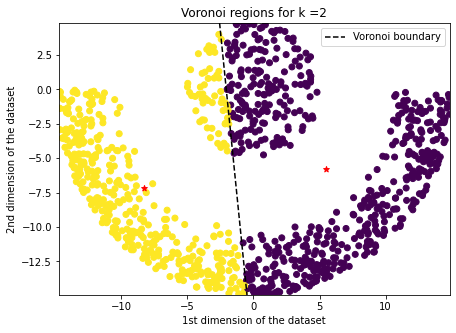

In [329]:
show_results_2(X,2,mu_rand)

## k = 3

Converged at iteration 29


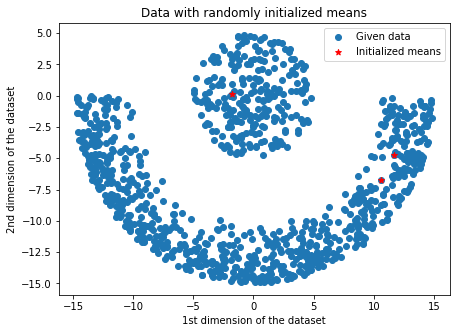

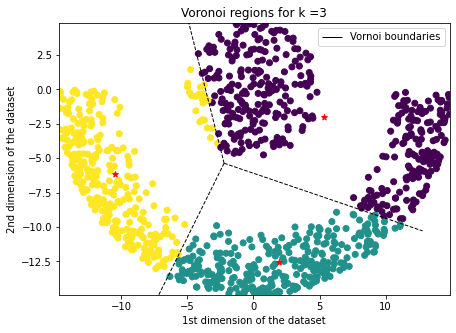

In [255]:
show_results_2(X,3,mu_rand)

## k = 4

Converged at iteration 11


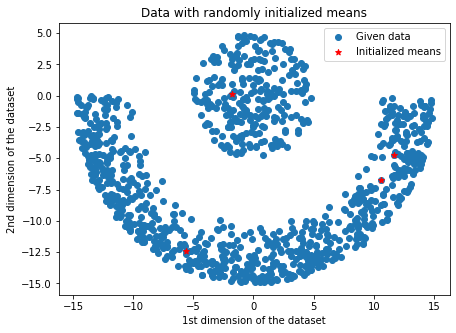

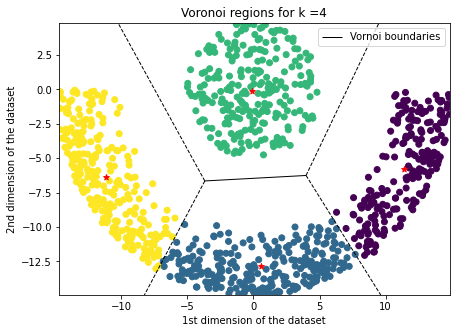

In [256]:
show_results_2(X,4,mu_rand)

## k = 5

Converged at iteration 14


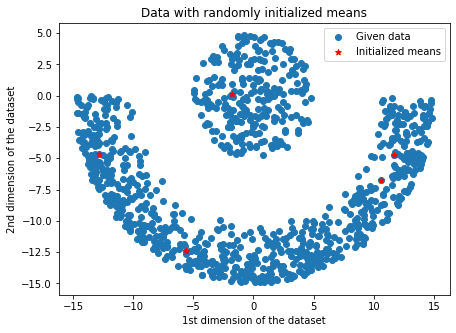

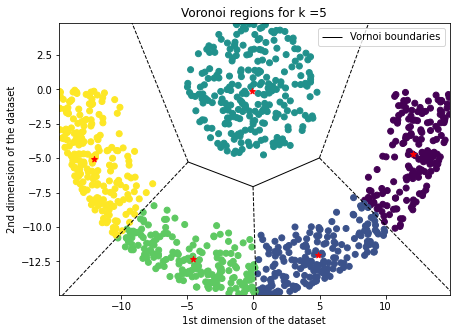

In [257]:
show_results_2(X,5,mu_rand)

## iii

In [259]:
def kernel_poly(xi,xj,d):
    return (1+xi.T@xj)**d

def kernel_rbf(xi,xj,sigma):
    return np.exp(-((xi-xj).T)@(xi-xj)/(2*sigma*sigma))
    
def spectral_clustering(X,kernel = 'poly',deg = 2,num_clusters = 2,sigma = 0.2,laplacian='n'):
    n = X.shape[0]
    
    K = np.empty((n,n))

    for i in range(n):
        for j in range(n):
            if kernel == 'poly':
                K[i,j] = kernel_poly(X[i],X[j],deg)
            if kernel == 'rbf':
                K[i,j] = kernel_rbf(X[i],X[j],sigma)
            

    # Computing H matrix
    H = []
    if laplacian == 'y':
        D = K.sum(axis=1)
        D = np.sqrt(1/D)
        L = np.multiply(D[np.newaxis,:], np.multiply(K,D[:,np.newaxis]))
        evalues,evectors = np.linalg.eigh(L)
        
    else:
        evalues,evectors = np.linalg.eigh(K)
        
    for k in range(num_clusters):
        H.append(evectors[:,-1-k])
    H = np.array(H)
    # Computing H_star matrix
    H_star = H.T/np.linalg.norm(H,axis=1)
    
    # Running lloyd's
    mu_i,z,error = kmeans(H_star,num_clusters,tol=1e-5)
    return z,error

In [280]:
def show_spectral(X,kernel = 'poly',deg = 2,num_clusters = 2,sigma = 0.2,laplacian='n'):
    z,error = spectral_clustering(X,kernel,deg,num_clusters,sigma,laplacian)
     
    
    data = X.T
    k = num_clusters
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    plt.scatter(data[0],data[1],c=z)
    plt.xlabel('1st dimension of the dataset')
    plt.ylabel('2nd dimension of the dataset')
    if kernel == 'poly':
        plt.title('Polynomial kernel with k={}, d={}'.format(k,deg))
    if kernel == 'rbf':
        plt.title('RBF kernel with k={}, sigma={}'.format(k,round(sigma,2)))
    #plt.legend(loc='best')
    
    plt.subplot(1,2,2)
    plt.plot(error)
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Error in running K-means')
    plt.show()
    
    return error[-1]

## Polynomial kernel

Converged at iteration 7


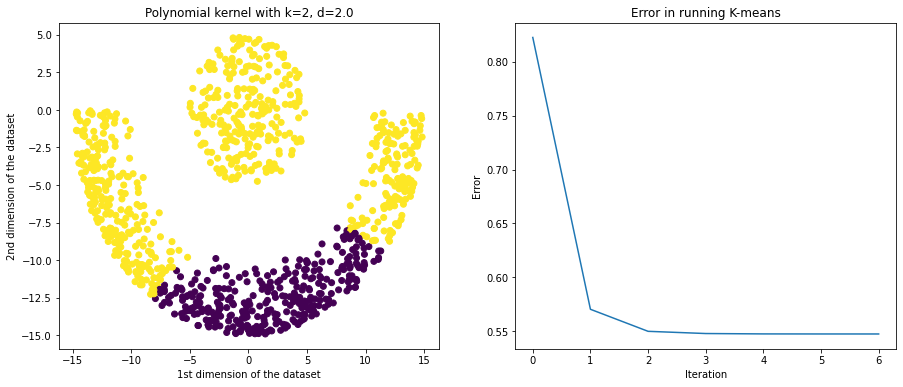

Converged at iteration 12


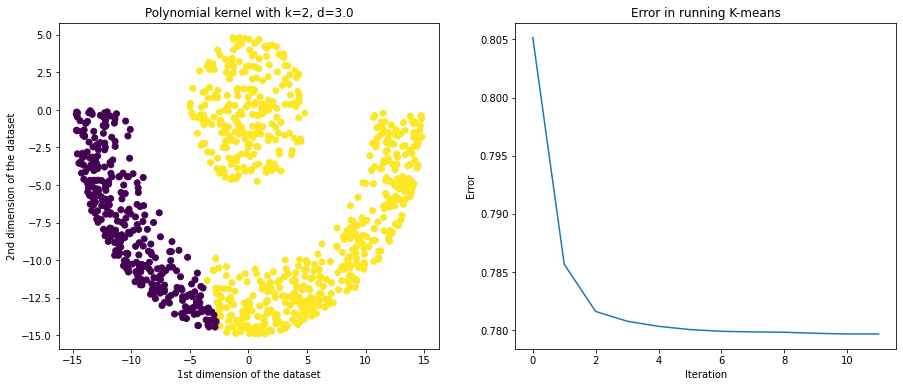

Converged at iteration 7


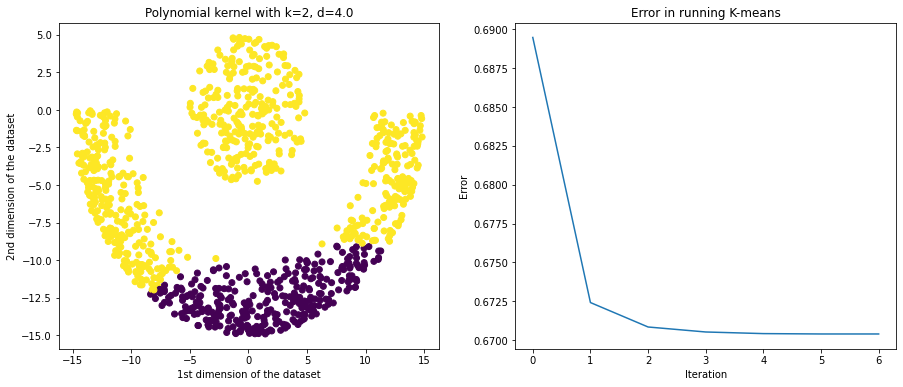

Converged at iteration 8


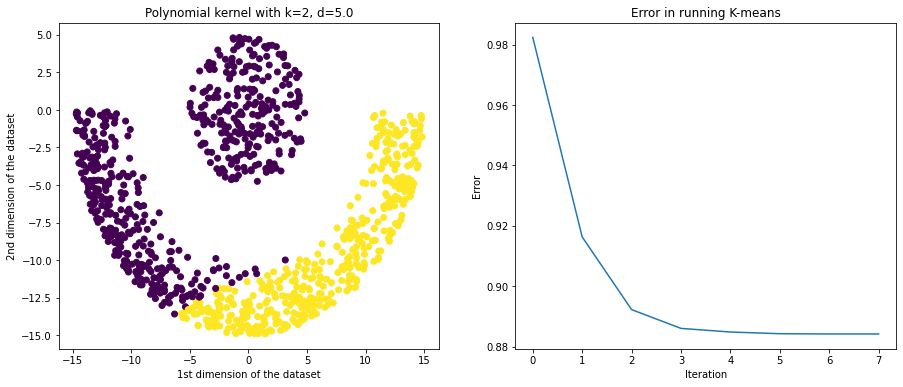

In [277]:
degr = np.linspace(2,5,4)
errr = []
for d in degr:
    errr.append(show_spectral(X,kernel='poly',deg=d))

In [330]:
errr

[0.5473300930347123,
 0.7796694882094444,
 0.6703955029142459,
 0.8841978486184485]

## RBF kernel

Converged at iteration 4


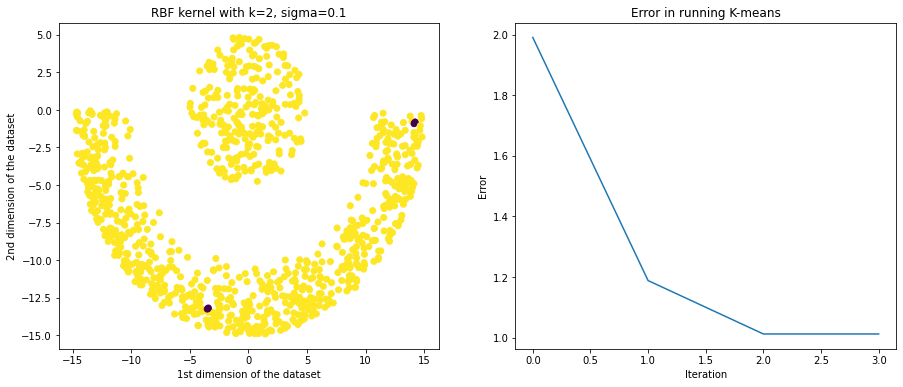

Converged at iteration 5


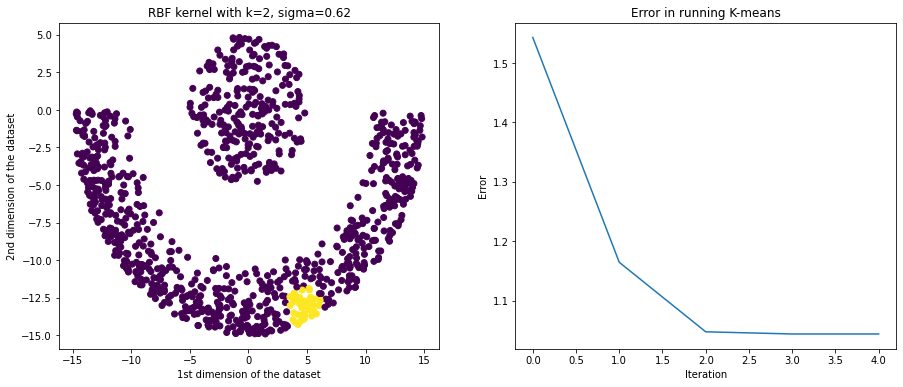

Converged at iteration 6


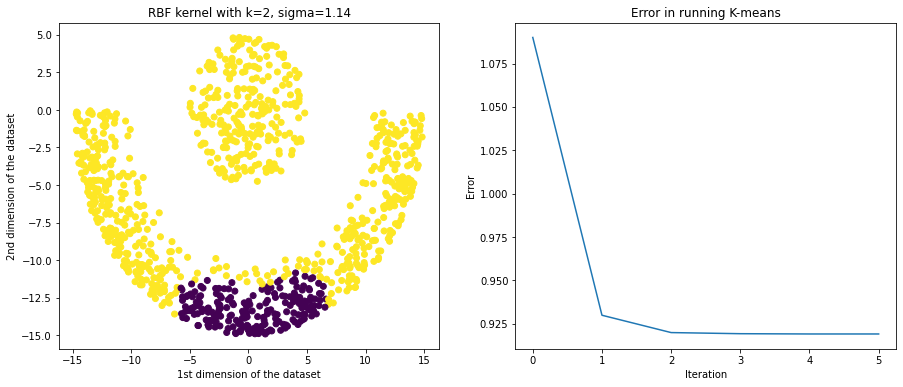

Converged at iteration 6


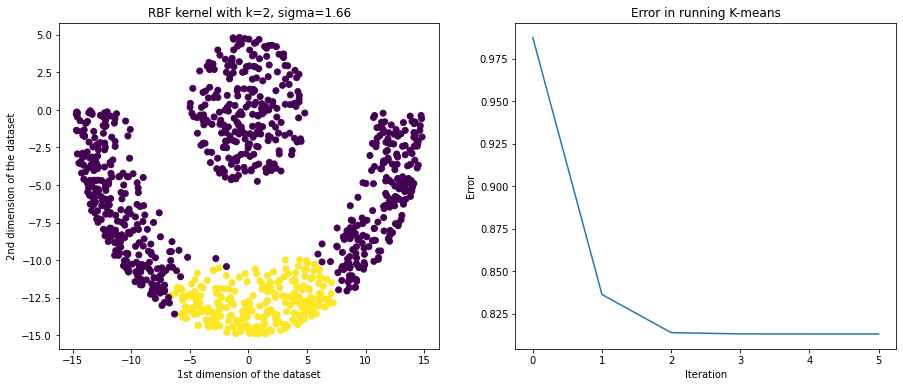

Converged at iteration 7


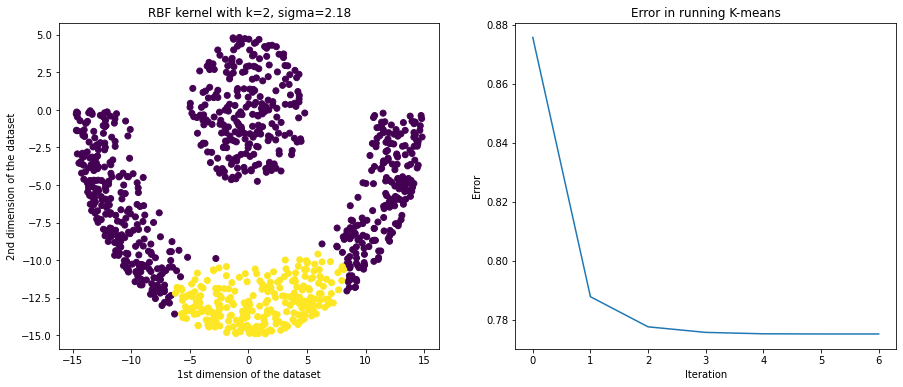

Converged at iteration 8


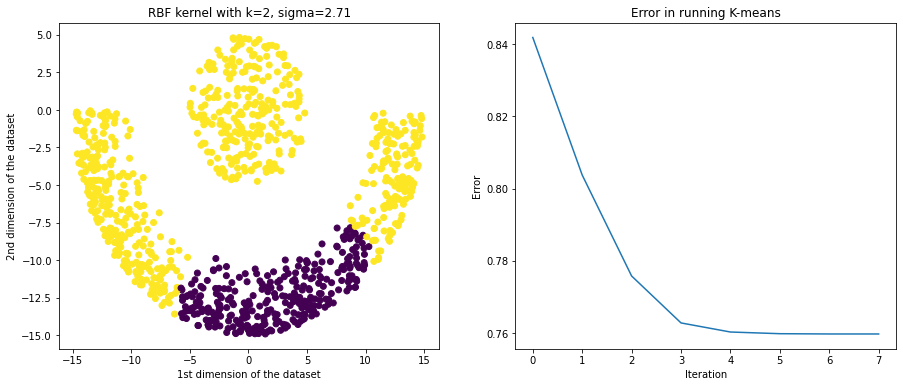

Converged at iteration 14


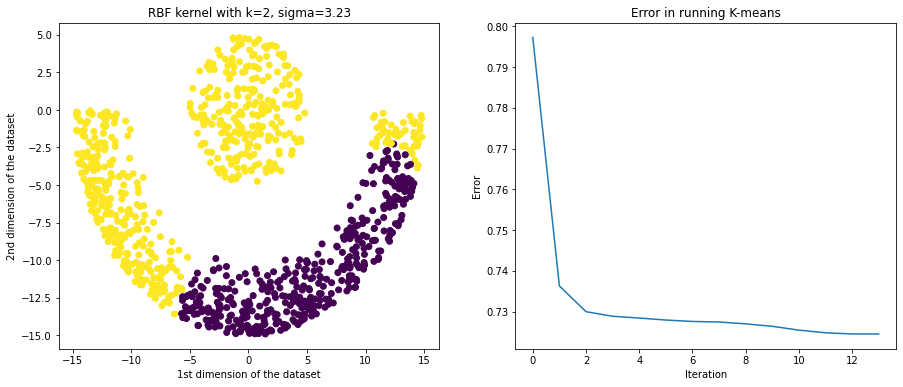

Converged at iteration 6


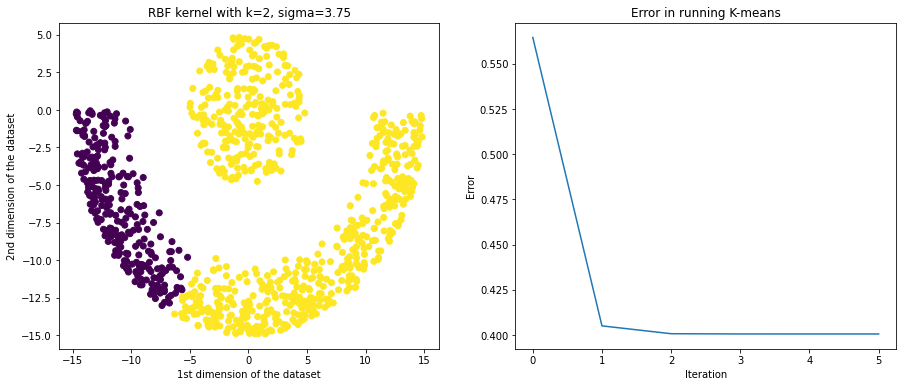

Converged at iteration 4


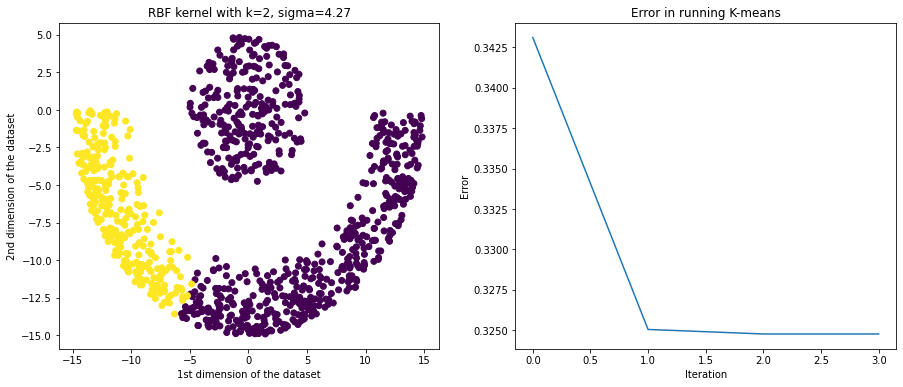

Converged at iteration 8


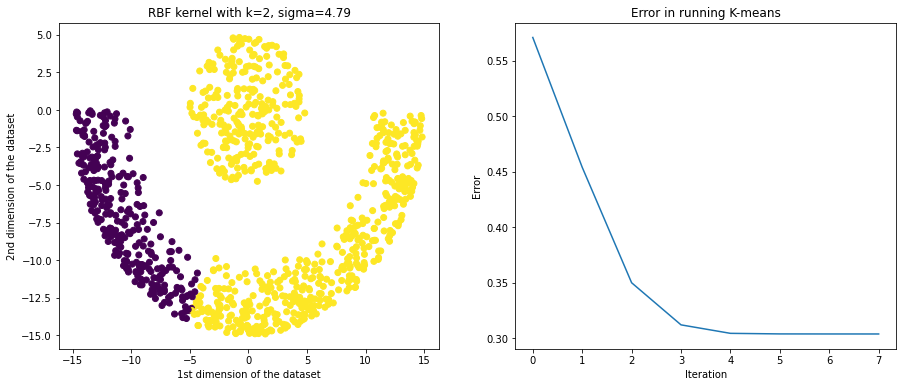

Converged at iteration 6


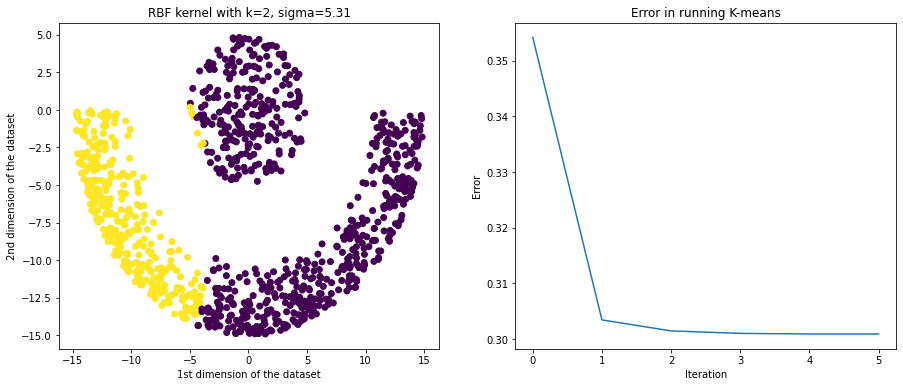

Converged at iteration 10


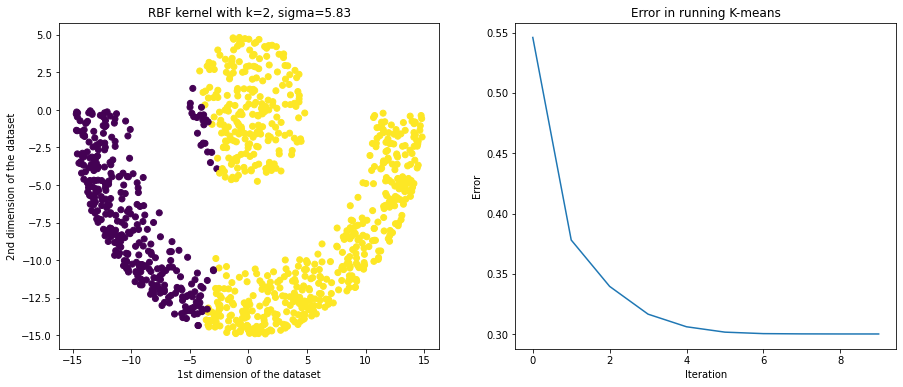

Converged at iteration 3


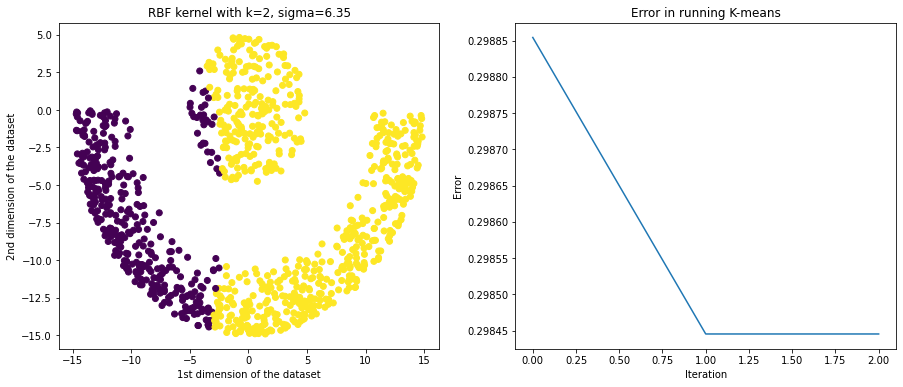

Converged at iteration 12


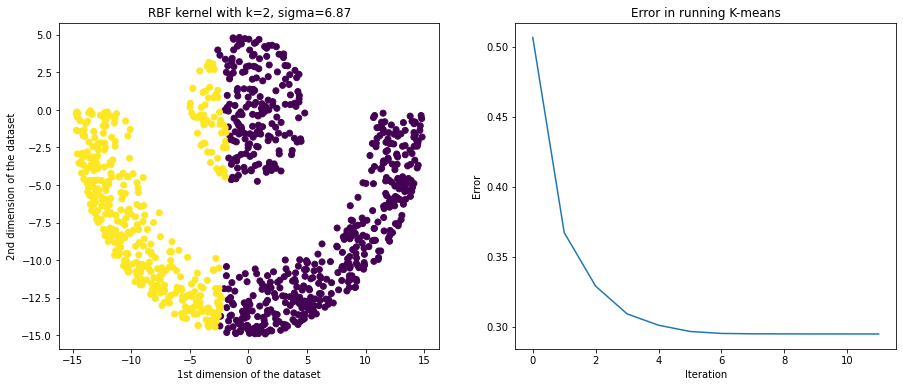

Converged at iteration 12


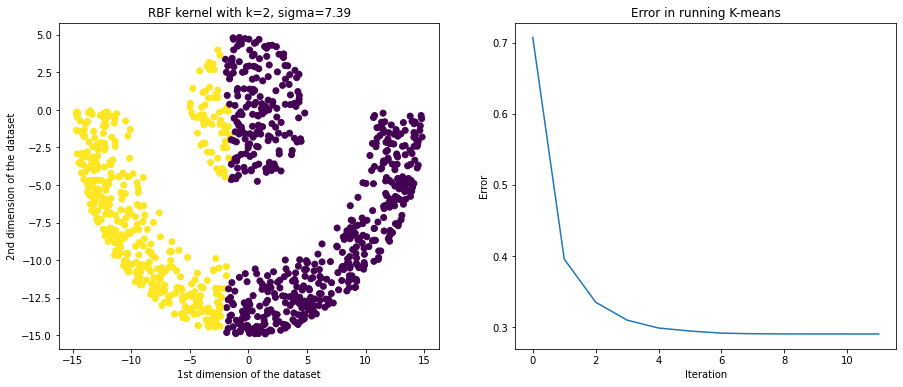

Converged at iteration 9


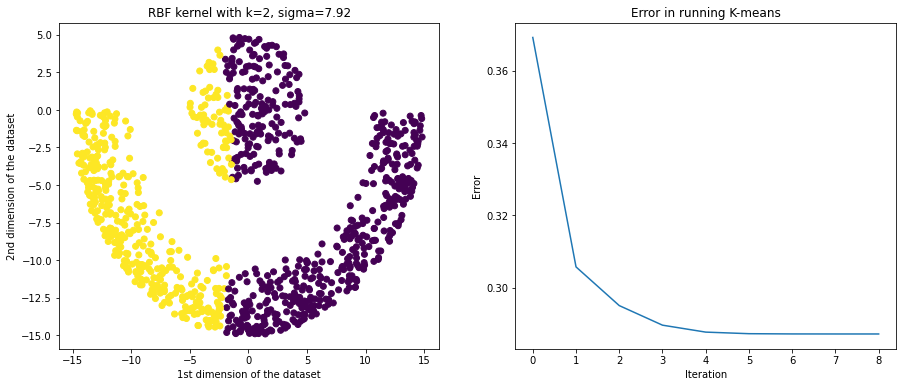

Converged at iteration 13


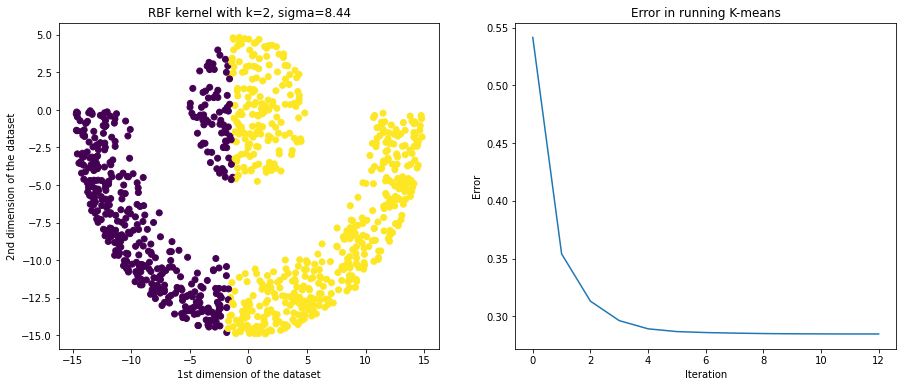

Converged at iteration 8


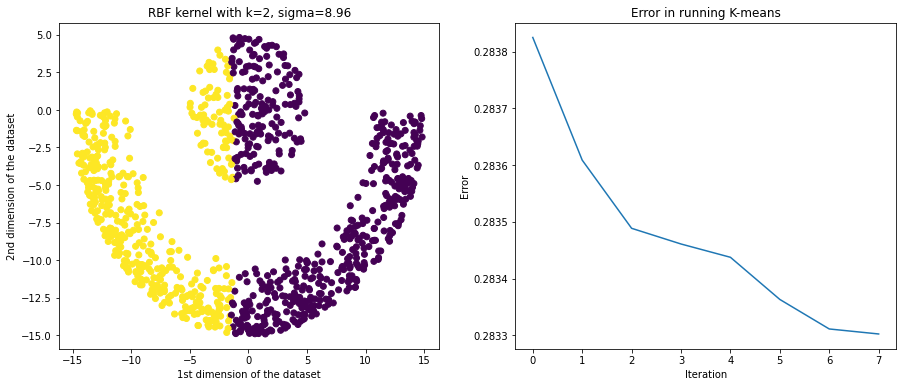

Converged at iteration 5


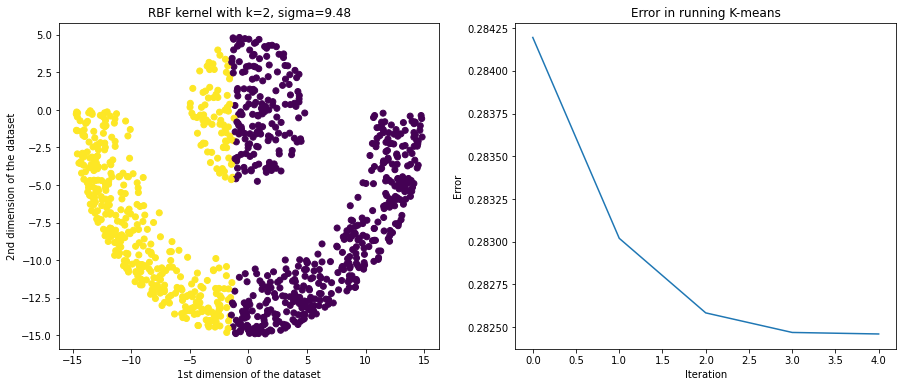

Converged at iteration 13


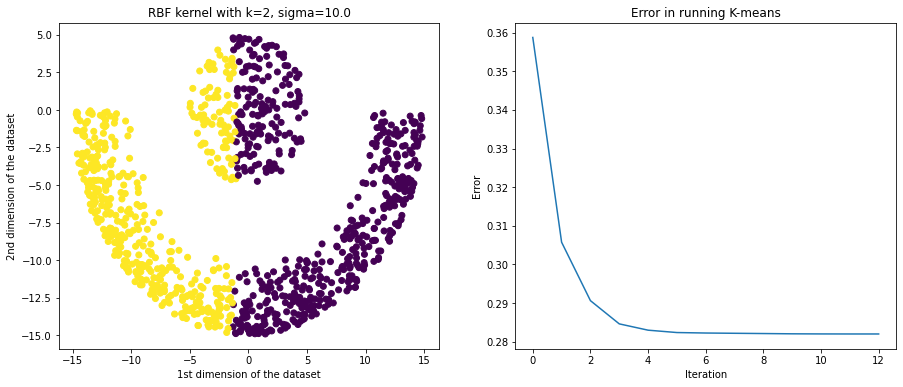

In [278]:
sig = np.linspace(0.1,10,20)
err=[]
for s in sig:
    err.append(show_spectral(X,kernel='rbf',sigma=s))

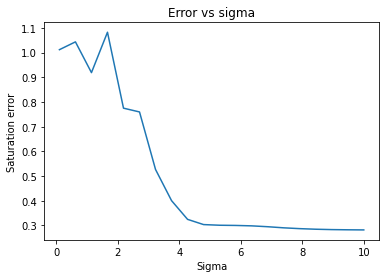

In [274]:
## Saturation error vs sigma plot

plt.figure(figsize = (6,4))
plt.plot(sig,err)
plt.xlabel('Sigma')
plt.ylabel('Saturation error')
plt.title('Error vs sigma')
plt.show()

## Laplacian 

Converged at iteration 2


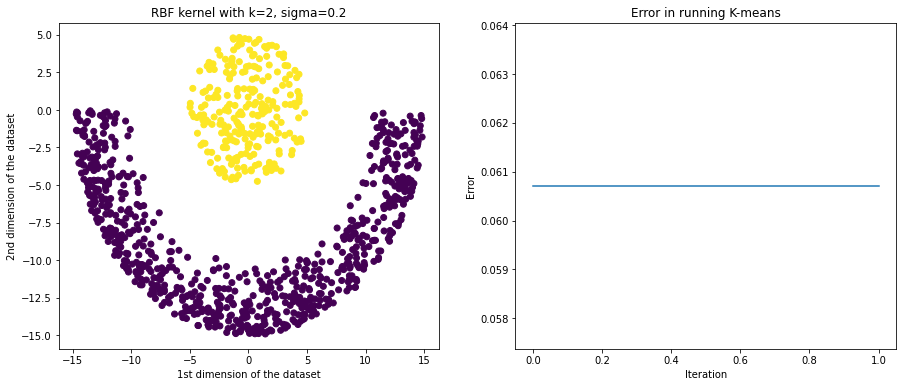

Error saturation = 0.060713958863824205


In [284]:
err = show_spectral(X,kernel='rbf',sigma=0.2,laplacian='y')
print("Error saturation = {}".format(err))

## iv

In [309]:
def mod_spectral(X, kernel='poly', deg=2, num_clusters=2, sigma=0.2):
    n = X.shape[0]
    
    K = np.empty((n,n))

    for i in range(n):
        for j in range(n):
            if kernel == 'poly':
                K[i,j] = kernel_poly(X[i],X[j],deg)
            if kernel == 'rbf':
                K[i,j] = kernel_rbf(X[i],X[j],sigma)
    
    # Computing H matrix
    H = []
    evalues,evectors = np.linalg.eigh(K)
    for k in range(num_clusters):
        H.append(evectors[:,-1-k])
    H = np.array(H)
    
    # Computing H_star matrix
    H_star = H.T/np.linalg.norm(H,axis=1)
    
    # Assigning cluster based on largest value in eigenvector
    maxi = H_star.max(axis=1)
    #print(maxi)
    z = []
    for i in range(n):
        z.append(np.where(H_star[i] == maxi[i])[0][0])
    
    return z

In [310]:
def show_mod_spectral(X,kernel = 'poly',deg = 2,num_clusters = 2,sigma = 0.2):
    z = mod_spectral(X,kernel,deg,num_clusters,sigma)
     
    
    data = X.T
    k = num_clusters
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    plt.scatter(data[0],data[1],c=z)
    plt.xlabel('1st dimension of the dataset')
    plt.ylabel('2nd dimension of the dataset')
    if kernel == 'poly':
        plt.title('Polynomial kernel with k={}, d={}'.format(k,deg))
    if kernel == 'rbf':
        plt.title('RBF kernel with k={}, sigma={}'.format(k,round(sigma,2)))
    plt.show()

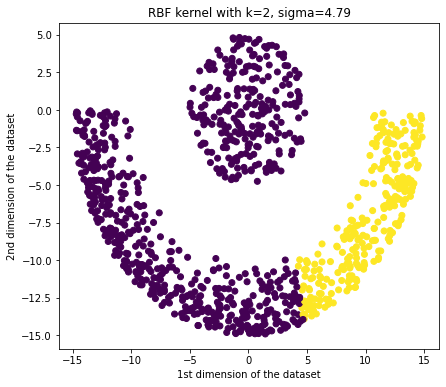

In [331]:
show_mod_spectral(X,kernel='rbf',sigma=4.79)